In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt
#from IPython.display import display
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15) 

In [2]:
from platform import python_version
print(python_version())

3.8.8


### Load the datasets

In [3]:
books = pd.read_csv("https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Books.csv.gz", compression = 'gzip', 
                    sep = ';', encoding = 'latin-1', low_memory=False)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv("https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Book-Ratings.csv.gz", compression = 'gzip',
                      sep = ';', encoding = 'latin-1', low_memory=False)
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users = pd.read_csv("https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Users.csv.gz", compression = 'gzip', 
                    sep = ';', encoding = 'latin-1', low_memory=False)
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
goodbooks = pd.read_csv("https://github.com/gdv/foundationsCS/raw/master/progetti/2021/goodbooks.csv.gz", compression = 'gzip', 
                        encoding = 'latin-1', low_memory=False)
goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [7]:
goodbooks.dtypes

book_id               int64
goodreads_book_id     int64
best_book_id          int64
work_id               int64
books_count           int64
                      ...  
ratings_3             int64
ratings_4             int64
ratings_5             int64
image_url            object
small_image_url      object
Length: 23, dtype: object

In [8]:
goodbooks_ratings = pd.read_csv("https://github.com/gdv/foundationsCS/raw/master/progetti/2021/goodbooks-ratings.csv.gz", 
                                compression = 'gzip', encoding = 'latin-1', low_memory=False)
goodbooks_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


### 1) Normalize the location field of Users dataset, splitting into city, region, country

In [9]:
users[['City', 'Region', 'Country']] = users['Location'].str.split(',', expand = True, n = 2)
users.drop('Location', axis = 1, inplace = True)
users.head()

,User-ID,Age,City,Region,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


### 2) For each book in the Books dataset, compute its average rating.

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
books_w_ratings = pd.merge(books, ratings, on='ISBN', how='left')
books_w_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [13]:
books_avg = books_w_ratings.groupby(['ISBN', 'Book-Title'], as_index=False)['Book-Rating'].mean()
books_avg.head()

,ISBN,Book-Title,Book-Rating
0,0000913154,The Way Things Work: An Illustrated Encycloped...,8.0
1,0001010565,Mog's Christmas,0.0
2,0001046438,Liar,9.0
3,0001046713,Twopence to Cross the Mersey,0.0
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",6.0


La distribuzione dei voti è parecchio strana comunque, ma non facciamoci troppe domande..

(array([647293.,   1481.,   2375.,   5118.,   7617.,  45355.,  31687.,
         66402.,  91804., 132003.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

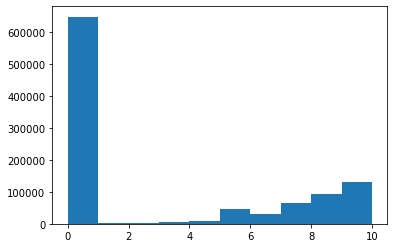

In [14]:
plt.hist(books_w_ratings['Book-Rating'])

### 3) For each book in the GoodBooks dataset, compute its average rating.

In [15]:
goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [16]:
goodbooks[['book_id', 'original_title', 'average_rating']]

,book_id,original_title,average_rating
0,1,The Hunger Games,4.34
1,2,Harry Potter and the Philosopher's Stone,4.44
2,3,Twilight,3.57
3,4,To Kill a Mockingbird,4.25
4,5,The Great Gatsby,3.89
...,...,...,...
94,95,The Picture of Dorian Gray,4.06
95,96,Fifty Shades Freed,3.88
96,97,Dracula,3.98
97,98,Flickan som lekte med elden,4.22


### 4) Merge together all rows sharing the same book title, author and publisher. We will call the resulting datset merged books. The books that have not been merged together will not appear in merged books.

In [17]:
merged = books.groupby(['Book-Title', 'Book-Author', 'Publisher'], as_index=False).size()
merged.head()
merged.shape

(266127, 4)

In [18]:
merged_books = merged[merged['size'] > 1]
merged_books.head(30)

,Book-Title,Book-Author,Publisher,size
41,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2
59,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2
255,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,2
465,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,3
713,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,2
...,...,...,...,...
1859,A Bend in the Road,Nicholas Sparks,Random House Large Print Publishing,2
1861,A Bend in the Road,Nicholas Sparks,Warner Books,3
2052,A Boy's Own Story,Edmund White,Plume Books,2
2095,A Brief History of Everything,KEN WILBER,Shambhala,2


In [19]:
merged_books.shape

(4725, 4)

#### Possibile problema
Ho provato a risolvere il punto udando filter (l'equivalente di HAVING in pandas)
- Il numero di righe risultà però diverso rispetto al precedente metodo

In [20]:
merged_ = books.groupby(['Book-Title', 'Book-Author', 'Publisher'], as_index=False).filter(lambda x: len(x) > 1)

In [21]:
merged_.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...
29,0684823802,OUT OF THE SILENT PLANET,C.S. Lewis,1996,Scribner,http://images.amazon.com/images/P/0684823802.0...,http://images.amazon.com/images/P/0684823802.0...,http://images.amazon.com/images/P/0684823802.0...
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...
54,0156047624,All the King's Men,Robert Penn Warren,1982,Harvest Books,http://images.amazon.com/images/P/0156047624.0...,http://images.amazon.com/images/P/0156047624.0...,http://images.amazon.com/images/P/0156047624.0...
64,0345260317,The Dragons of Eden: Speculations on the Evolu...,Carl Sagan,1978,Ballantine Books,http://images.amazon.com/images/P/0345260317.0...,http://images.amazon.com/images/P/0345260317.0...,http://images.amazon.com/images/P/0345260317.0...


In [22]:
merged_[merged_['Book-Title'] == "All the King's Men"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
54,0156047624,All the King's Men,Robert Penn Warren,1982,Harvest Books,http://images.amazon.com/images/P/0156047624.0...,http://images.amazon.com/images/P/0156047624.0...,http://images.amazon.com/images/P/0156047624.0...
77397,0156012952,All the King's Men,Robert Penn Warren,2002,Harvest Books,http://images.amazon.com/images/P/0156012952.0...,http://images.amazon.com/images/P/0156012952.0...,http://images.amazon.com/images/P/0156012952.0...
119785,0151047723,All the King's Men,Robert Penn Warren,1990,Harcourt,http://images.amazon.com/images/P/0151047723.0...,http://images.amazon.com/images/P/0151047723.0...,http://images.amazon.com/images/P/0151047723.0...
148204,0151006105,All the King's Men,Robert Penn Warren,2001,Harcourt,http://images.amazon.com/images/P/0151006105.0...,http://images.amazon.com/images/P/0151006105.0...,http://images.amazon.com/images/P/0151006105.0...


In [23]:
merged_books[merged_books['Book-Title'] == "All the King's Men"]

,Book-Title,Book-Author,Publisher,size
12673,All the King's Men,Robert Penn Warren,Harcourt,2
12674,All the King's Men,Robert Penn Warren,Harvest Books,2


Il problema dell'usare la funzione filter mi sembra sia quello che poi non va effettivamente a raggruppare le righe, ma inserisce nel dataframe che stiamo creando tutte le righe del gruppo. Per questo motivo la dimensione del dataframe è maggiore, perchè anzichè riportare un unico gruppo per ciascuna tripla (titolo-autore-publisher) 

In [24]:
merged_.shape

(9954, 8)

### 5) For each book in merged books compute its average rating.

In [25]:
merged_books_w_avg = pd.merge(merged_books, books_avg, on="Book-Title")
merged_books_w_avg.head()

,Book-Title,Book-Author,Publisher,size,ISBN,Book-Rating
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2,1565920317,6.00
1,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2,1565920465,0.00
2,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2,0792276833,0.00
3,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2,0792277295,3.40
4,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,2,1566196256,7.25


In [26]:
merged_books_w_avg.groupby(['Book-Title', 'Book-Author', 'Publisher'], as_index=False)['Book-Rating'].mean()

,Book-Title,Book-Author,Publisher,Book-Rating
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,3.000000
1,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,1.700000
2,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,6.958333
3,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,3.111111
4,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,0.000000
...,...,...,...,...
4720,Zia,Scott O'Dell,Laurel-Leaf Books,1.859048
4721,Zia,Scott O'Dell,Yearling Books,1.859048
4722,Zimmermann Telegram,Barbara Tuchman,Ballantine Books,2.000000
4723,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,Viz Comics,10.000000


### 6) For each book in merged books compute the minimum and maximum of the average ratings over all corresponding books in the books dataset.

In [27]:
merged_books_w_ratings = pd.merge(merged_books, books_w_ratings, on = ['Book-Title', 'Book-Author', 'Publisher'])
merged_books_w_ratings.head()

,Book-Title,Book-Author,Publisher,size,ISBN,Year-Of-Publication,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2,1565920465,1994,http://images.amazon.com/images/P/1565920465.0...,http://images.amazon.com/images/P/1565920465.0...,http://images.amazon.com/images/P/1565920465.0...,271245.0,0.0
1,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2,1565920317,1993,http://images.amazon.com/images/P/1565920317.0...,http://images.amazon.com/images/P/1565920317.0...,http://images.amazon.com/images/P/1565920317.0...,87141.0,6.0
2,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2,0792276833,2000,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,79186.0,0.0
3,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2,0792276833,2000,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,114216.0,0.0
4,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2,0792276833,2000,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,http://images.amazon.com/images/P/0792276833.0...,201058.0,0.0


In [28]:
merged_books_w_ratings.groupby(['Book-Title', 'Book-Author', 'Publisher'], as_index=False)['Book-Rating'].max().head()

,Book-Title,Book-Author,Publisher,Book-Rating
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,6.0
1,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,9.0
2,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,10.0
3,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,10.0
4,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,0.0


In [29]:
merged_books_w_ratings.groupby(['Book-Title', 'Book-Author', 'Publisher'], as_index=False)['Book-Rating'].min().head()

,Book-Title,Book-Author,Publisher,Book-Rating
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,0.0
1,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,0.0
2,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,4.0
3,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,0.0
4,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,0.0


### 7) For each book in goodbooks, compute the list of its authors. Assuming that the number of reviews with a text (column work_text_reviews_count) is split equally among all authors, find for each authors the total number of reviews with a text. We will call this quantity the shared number of reviews with a text.

In [30]:
goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


- Mia versione:

In [31]:
#%%timeit
# Ogni elemento della colonna autore è formato dalle stringhe degli autori del libro separati da una virgola
# Converto ogni elemento in una lista degli autori del libro
goodbooks_ = goodbooks.assign(authors=goodbooks['authors'].str.split(','))
goodbooks_.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [32]:
# Ottengo una colonna che, per ogni libro, trova il numero delle recensioni testuali divise per il numero di autri
goodbooks_['work_text_reviews_count_per_author'] = goodbooks_['work_text_reviews_count'] / goodbooks_['authors'].str.len()
goodbooks_.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,work_text_reviews_count_per_author
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,155254.0
1,2,3,3,4640799,491,439554934,9.780440e+12,...,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,37933.5
2,3,41865,41865,3212258,226,316015849,9.780316e+12,...,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,95009.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,...,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,72586.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,...,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,51992.0


In [33]:
# Splitto ogni riga che presenta n autori in n righe separate, dove a ogni libro è associato un solo oautore
goodbooks_ = goodbooks_.explode('authors')
goodbooks_.head()
goodbooks_.sort_values('original_publication_year')

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,work_text_reviews_count_per_author
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,...,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,1620.2
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,...,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,1620.2
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,...,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,1620.2
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,...,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,1620.2
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,...,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,1620.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,11735983,11735983,15524542,164,7442912,9.780007e+12,...,44620,182131,339977,369969,https://images.gr-assets.com/books/1325667729m...,https://images.gr-assets.com/books/1325667729s...,55873.0
29,30,8442457,19288043,13306276,196,297859382,9.780298e+12,...,80807,280331,616031,610476,https://images.gr-assets.com/books/1339602131m...,https://images.gr-assets.com/books/1339602131s...,121614.0
95,96,13536860,13536860,18034963,133,345803507,9.780346e+12,...,55691,109963,140304,265079,https://images.gr-assets.com/books/1336418837m...,https://images.gr-assets.com/books/1336418837s...,25287.0
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,...,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,140739.0


In [34]:
# Trovo il numero totale di recensioni scritte per autore
columns_ = {"authors": "authors", "work_text_reviews_count_per_author": "shared_number_of_reviews_with_a_text"}
authors_reviews_ = pd.DataFrame(goodbooks_.groupby(['authors'], as_index = False)['work_text_reviews_count_per_author']\
                                .sum().round()).rename(columns = columns_)
authors_reviews_.sort_values('authors')

,authors,shared_number_of_reviews_with_a_text
0,Alan R. Clarke,27890.0
1,B.M. Mooyaart-Doubleday,6942.0
2,Bernard Knox,1620.0
3,CelÃ¢l Ãster,15173.0
4,David J. Skal,5754.0
...,...,...
105,Veronica Roth,156896.0
106,William Golding,26886.0
107,William Goldman,15630.0
108,William Shakespeare,7389.0


In [35]:
# possibile idea, creo una tabella ponte tra book_id e autore (test, non so a cosa possa servire)
# Per renderla più efficace dovrei assegnare ad ogni autore un id
gb_books_authors = goodbooks_[['book_id', 'authors']]
gb_books_authors.head()

,book_id,authors
0,1,Suzanne Collins
1,2,J.K. Rowling
1,2,Mary GrandPrÃ©
2,3,Stephenie Meyer
3,4,Harper Lee


* Soluzione di gianluca

In [36]:
gb_authors = {}

def gb_diz(authors, count):
    for i in range(len(authors)):
        occ = authors[i].split(',')
        for elem in occ:
            if elem in gb_authors:
                gb_authors[elem] += count[i]/len(occ)
            else:
                gb_authors[elem] = count[i]/len(occ)

In [37]:
authors = list(goodbooks['authors'])
work_text_reviews_count = list(goodbooks['work_text_reviews_count'])

In [38]:
gb_diz(authors, work_text_reviews_count)

In [39]:
gb_authors

{'Suzanne Collins': 340066.0,
 'J.K. Rowling': 136668.0,
 ' Mary GrandPrÃ©': 136668.0,
 'Stephenie Meyer': 258573.0,
 'Harper Lee': 72586.0,
 'F. Scott Fitzgerald': 51992.0,
 'John Green': 230584.0,
 'J.R.R. Tolkien': 52986.0,
 'J.D. Salinger': 44920.0,
 'Dan Brown': 66672.0,
 'Jane Austen': 52994.0,
 'Khaled Hosseini': 103375.0,
 'Veronica Roth': 156896.0,
 'George Orwell': 50644.666666666664,
 ' Erich Fromm': 15172.666666666666,
 ' CelÃ¢l Ã\x9cster': 15172.666666666666,
 'Anne Frank': 6941.666666666667,
 ' Eleanor Roosevelt': 6941.666666666667,
 ' B.M. Mooyaart-Doubleday': 6941.666666666667,
 'Stieg Larsson': 46983.0,
 ' Reg Keeland': 46983.0,
 ' Rufus Beck': 12033.0,
 'Alice Sebold': 36642.0,
 'William Golding': 26886.0,
 'William Shakespeare': 7389.0,
 ' Robert           Jackson': 7389.0,
 'Gillian Flynn': 121614.0,
 'Kathryn Stockett': 78204.0,
 'John Steinbeck': 24642.0,
 'Arthur Golden': 25605.0,
 'E.L. James': 128776.0,
 'Paulo Coelho': 27890.5,
 ' Alan R. Clarke': 27890.5,
 'L

In [40]:
len(gb_authors)

110

In [41]:
authors_reviews = pd.DataFrame.from_dict(gb_authors, orient = 'index', columns = ['shared number of reviews with a text'])
authors_reviews

,shared number of reviews with a text
Suzanne Collins,340066.000000
J.K. Rowling,136668.000000
Mary GrandPrÃ©,136668.000000
Stephenie Meyer,258573.000000
Harper Lee,72586.000000
...,...
Oscar Wilde,9823.500000
Jeffrey Eugenides,9823.500000
Bram Stoker,5754.333333
Nina Auerbach,5754.333333


### 8) For each year of publication, determine the author that has the largest value of the shared number of reviews with a text.

Possibile significato della domanda:
1) Per ogni anno, trovare l'autore che, per un libro scritto in quell'anno, ha ottenuto il massimo numero di recensioni scritte per quel libro (crea problema perchè se un libro ha coautori questi saranno entrambi valore max)
2) Per ogni anno, trovare l'autore che, sommando il numero delle recensioni per tutti i libri scritti in quell'anno ha il numero massimo
3) Per ogni anno, trovare l'autore che, avendo publicato un libro in quell'anno, ha il numero TOTALE massimo di recensioni (contando libri scritti in tutta la sua carriera contenuti nel dataset)

In [42]:
goodbooks_.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'work_text_reviews_count_per_author'],
      dtype='object')

In [43]:
import numpy as np
np.sort(goodbooks_['original_publication_year'].unique())
# Il valore negativo è relativo all'odissea 

array([-720., 1595., 1811., 1813., 1818., 1847., 1859., 1868., 1884.,
       1891., 1897., 1911., 1925., 1932., 1936., 1937., 1945., 1946.,
       1947., 1949., 1950., 1951., 1952., 1953., 1954., 1958., 1960.,
       1964., 1967., 1969., 1973., 1974., 1977., 1979., 1985., 1988.,
       1989., 1990., 1993., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2015.])

Ipotizzo che la domanda giusta sia la 2)

In [44]:
# goodbooks_.groupby(['original_publication_year'], as_index=False)['work_text_reviews_count_per_author'].max()
# Devo scrivere per forza un sum() prima del max() per includere gli autori che hanno scritto più di un libro nello stesso anno
colonne = {'original_publication_year':'original_publication_year', 'authors':'authors', \
           'work_text_reviews_count_per_author':'shared_number_of_reviews_with_a_text'}
gb_year_author_shared = goodbooks_.groupby(['original_publication_year', 'authors'], as_index=False)\
            ['work_text_reviews_count_per_author'].sum().round().rename(columns = colonne)
gb_year_author_shared.head(20)

,original_publication_year,authors,shared_number_of_reviews_with_a_text
0,-720.0,Bernard Knox,1620.0
1,-720.0,E.V. Rieu,1620.0
2,-720.0,FrÃ©dÃ©ric Mugler,1620.0
3,-720.0,Robert Fagles,1620.0
4,-720.0,Homer,1620.0
...,...,...,...
15,1847.0,Richard J. Dunn,13078.0
16,1847.0,Charlotte BrontÃ«,15606.0
17,1847.0,Emily BrontÃ«,13078.0
18,1859.0,Hablot Knight Browne,4364.0


In [45]:
# Ora seleziono, per ogni anno, gli autori con shared massimo
best_author_of_the_year = gb_year_author_shared.iloc[gb_year_author_shared.groupby(['original_publication_year'])\
                                   ['shared_number_of_reviews_with_a_text'].idxmax()]
best_author_of_the_year.head(30)
# I valori si discostano da quelli delle soluzioni perchè ho deciso di effettuare il sum per un certo autore in uno specifico anno
# Se mi limitassi a scegliere l'autore, per ogni anno, che per un certo libro presenta il massimo numero di recensioni scritte
# allora coincidono (dovrei seplicemente saltare il passaggio del sum e fare direttamente idxmax)
# Oltretutto ci sarebbero sicuramente dei duplicati per quei libri publicati da più autori

,original_publication_year,authors,shared_number_of_reviews_with_a_text
0,-720.0,Bernard Knox,1620.0
5,1595.0,Robert Jackson,7389.0
7,1811.0,Ros Ballaster,3842.0
10,1813.0,Jane Austen,49152.0
11,1818.0,Maurice Hindle,6664.0
...,...,...,...
55,1958.0,Marion Wiesel,11000.0
57,1960.0,Harper Lee,72586.0
58,1964.0,Shel Silverstein,14368.0
61,1967.0,S.E. Hinton,22662.0


* Soluzione alternativa 3) (considero lo shared generale)

In [46]:
goodbooks_reviews = pd.merge(goodbooks_, authors_reviews_, on = 'authors')
goodbooks_reviews

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_3,ratings_4,ratings_5,image_url,small_image_url,work_text_reviews_count_per_author,shared_number_of_reviews_with_a_text
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,155254.000000,340066.0
1,17,6148028,6148028,6171458,201,439023491,9.780439e+12,...,262010,687238,980309,https://images.gr-assets.com/books/1358273780m...,https://images.gr-assets.com/books/1358273780s...,88538.000000,340066.0
2,20,7260188,7260188,8812783,239,439023513,9.780439e+12,...,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...,96274.000000,340066.0
3,2,3,3,4640799,491,439554934,9.780440e+12,...,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,37933.500000,136668.0
4,18,5,5,2402163,376,043965548X,9.780440e+12,...,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,12033.000000,136668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,95,5297,5297,1858012,2303,375751513,9.780376e+12,...,129420,246892,257679,https://images.gr-assets.com/books/1424596966m...,https://images.gr-assets.com/books/1424596966s...,9823.500000,9824.0
137,95,5297,5297,1858012,2303,375751513,9.780376e+12,...,129420,246892,257679,https://images.gr-assets.com/books/1424596966m...,https://images.gr-assets.com/books/1424596966s...,9823.500000,9824.0
138,97,17245,17245,3165724,2207,393970124,9.780394e+12,...,151396,246043,243825,https://images.gr-assets.com/books/1387151694m...,https://images.gr-assets.com/books/1387151694s...,5754.333333,5754.0
139,97,17245,17245,3165724,2207,393970124,9.780394e+12,...,151396,246043,243825,https://images.gr-assets.com/books/1387151694m...,https://images.gr-assets.com/books/1387151694s...,5754.333333,5754.0


In [47]:
goodbooks_reviews.iloc[goodbooks_reviews.groupby(['original_publication_year'])['shared_number_of_reviews_with_a_text']\
                       .idxmax()][['original_publication_year', 'authors','shared_number_of_reviews_with_a_text']]

,original_publication_year,authors,shared_number_of_reviews_with_a_text
110,-720.0,Homer,1620.0
52,1595.0,William Shakespeare,7389.0
33,1811.0,Jane Austen,52994.0
32,1813.0,Jane Austen,52994.0
100,1818.0,Mary Wollstonecraft Shelley,6664.0
...,...,...,...
1,2009.0,Suzanne Collins,340066.0
2,2010.0,Suzanne Collins,340066.0
36,2011.0,Veronica Roth,156896.0
24,2012.0,John Green,230584.0


### 9) Assuming that there are no errors in the ISBN fields, find the books in both datasets, and compute the difference of average rating according to the ratings and the goodratings datasets

In [48]:
both = pd.merge(goodbooks[['book_id', 'isbn', 'authors', 'title', 'average_rating']], books_avg[['ISBN', 'Book-Rating']], 
                left_on = 'isbn', right_on = 'ISBN')
both

,book_id,isbn,authors,title,average_rating,ISBN,Book-Rating
0,11,1594480001,Khaled Hosseini,The Kite Runner,4.26,1594480001,2.400000
1,18,043965548X,"J.K. Rowling, Mary GrandPrÃ©, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,4.53,043965548X,3.533333
2,60,1400032717,Mark Haddon,The Curious Incident of the Dog in the Night-Time,3.85,1400032717,4.813187
3,75,014028009X,Helen Fielding,"Bridget Jones's Diary (Bridget Jones, #1)",3.75,014028009X,3.751852
4,90,014038572X,S.E. Hinton,The Outsiders,4.06,014038572X,4.460674


In [49]:
both['avg_difference'] = both['average_rating']-both['Book-Rating']
both

,book_id,isbn,authors,title,average_rating,ISBN,Book-Rating,avg_difference
0,11,1594480001,Khaled Hosseini,The Kite Runner,4.26,1594480001,2.400000,1.860000
1,18,043965548X,"J.K. Rowling, Mary GrandPrÃ©, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,4.53,043965548X,3.533333,0.996667
2,60,1400032717,Mark Haddon,The Curious Incident of the Dog in the Night-Time,3.85,1400032717,4.813187,-0.963187
3,75,014028009X,Helen Fielding,"Bridget Jones's Diary (Bridget Jones, #1)",3.75,014028009X,3.751852,-0.001852
4,90,014038572X,S.E. Hinton,The Outsiders,4.06,014038572X,4.460674,-0.400674


#### Possibile Problematica: Diversa scala dei ratings
average_rating e Book-Rating hanno scale diverse

In [50]:
print(goodbooks['average_rating'].min(), goodbooks['average_rating'].max())
print(books_avg['Book-Rating'].min(), books_avg['Book-Rating'].max(), books_avg['Book-Rating'].mean())
print(books_avg['Book-Rating_re_scaled'].min(), books_avg['Book-Rating_re_scaled'].max(), books_avg['Book-Rating_re_scaled'].mean())

3.51 4.61
0.0 10.0 2.884363687125143


KeyError: 'Book-Rating_re_scaled'

In [ ]:
plt.hist(books_avg['Book-Rating'])

In [ ]:
plt.hist(books_avg['Book-Rating_re_scaled'])

Propongo di applicare un Re-Scaling a Book-Rating e comprimere la scala da 0-10 a 0-5
- Sembra invece meno consigliato convertire 0-5 in 0-10
[https://trcmarketresearch.com/whitepaper/scale-conversions/] 

In [ ]:
books_avg['Book-Rating_re_scaled'] = books_avg['Book-Rating'] / 2
books_avg.head()

In [ ]:
both_re_scaled = pd.merge(goodbooks[['book_id', 'isbn', 'authors', 'title', 'average_rating']], books_avg[['ISBN', 'Book-Rating', 'Book-Rating_re_scaled']], 
                left_on = 'isbn', right_on = 'ISBN')
both_re_scaled['avg_difference'] = both_re_scaled['average_rating'] - both_re_scaled['Book-Rating_re_scaled']
both_re_scaled[['book_id', 'title', 'Book-Rating', 'Book-Rating_re_scaled', 'average_rating', 'avg_difference']].head(10)

### 10) Split the users dataset according to the age. One dataset contains the users with unknown age, one with age 0-14, one with age 15-24, one with age 25-34, and so on.

In [ ]:
users.head()

In [ ]:
users_nan = users[users['Age'].isnull()]
users_nan

In [ ]:
users_temp = users[users['Age'].notnull()]
users_temp

In [ ]:
users_temp['Age_group'] = pd.cut(users_temp['Age'], bins = [0, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000], right = False,
                                labels = ['<15', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '>95'])
users_temp

In [ ]:
grouped = users_temp.groupby(users_temp.Age_group)

x = list(grouped.groups)
df = {}

for elem in x:
    df[elem] = grouped.get_group(elem)
    
df['>95']

#### Alternativa senza loop alla cella precedente (identico processo logico)
- Il timeit restituisce un tempo migliore nella mia soluzione anche se non di troppo (5ms per loop)
- Funzionamento:
1. Tuple(), applicato ad un oggetto gorupby crea una tupla dei gruppi
    - Una tupla è molto simile ad una lista (come in una lista ho elementi eterogenei e ordinati, ma nel caso della tupla questi sono immutabili)
    - Ogni elemento della tupla nel caso specifico è formato da:
        1. Il nome del gruppo di età
        2. virgola
        3. l'insieme delle righe appartenenti ad un gruppo di età
2. Dict() trasforma la tupla in un dizionario:
    - Il nome del gruppo diventa la key
    - Il valore associato è un pd.dataframe degli utenti di quel gruppo

In [ ]:
d = dict(tuple(users_temp.groupby('Age_group')))
d['>95']

### 11) Find the books that appear only in the goodbooks datasets.

In [53]:
only_goodbooks = pd.merge(goodbooks, books['ISBN'], left_on = 'isbn', right_on = 'ISBN', how = 'left')
only_goodbooks = only_goodbooks[only_goodbooks['ISBN'].isnull()]
only_goodbooks[['goodreads_book_id', 'authors']]

,goodreads_book_id,authors
0,2767052,Suzanne Collins
1,3,"J.K. Rowling, Mary GrandPrÃ©"
2,41865,Stephenie Meyer
3,2657,Harper Lee
4,4671,F. Scott Fitzgerald
...,...,...
94,5297,"Oscar Wilde, Jeffrey Eugenides"
95,13536860,E.L. James
96,17245,"Bram Stoker, Nina Auerbach, David J. Skal"
97,5060378,"Stieg Larsson, Reg Keeland"


#### Possibile alternativa (molto più ottimizzata 95 ms per loop vs 33,8ms per loop):
- Uso il set operator di intersezione di pandas isin() / l'equivalente di IN di SQL
- Seleziono i libri non appartenenti all'intersezione con fancy indexing (EXCEPT)

In [ ]:
goodbooks_not_books = goodbooks[goodbooks.isbn.isin(books.ISBN) == False]
goodbooks

### 12) Assuming that each pair (author, title) identifies a book, for each book find the number of times it appears in the books dataset. Which books appear the most times?

In [ ]:
pairs = books.groupby(['Book-Title', 'Book-Author'], as_index = False).size()
pairs.loc[pairs['size'].idxmax()]

In [ ]:
pairs[pairs['size'] == 21]

### 13) Find the author with the highest average rating according to the goodbooks datasets.

In [ ]:
# Per come l'ho intesa io, dobbiamo andare a fare esattamente come nel punto 7), replicando ogni riga un numero di volte pari
# al numero di autori di quel libro. Quindi, possiamo usare il dataframe goodbooks_ che hai già costruito in quel punto. A 
# questo punto, credo che la richiesta sia quella di andare a fare una groupby sul nome dell'autore per poi calcolare la media
# del rating, che nel database goodbooks di partenza è già presente nella colonna 'average_rating'.
goodbooks_.columns

In [ ]:
goodbooks_avg_rating = goodbooks_[['authors', 'average_rating']]
goodbooks_avg_rating

In [ ]:
goodbooks_avg_rating_per_author = goodbooks_avg_rating.groupby('authors', as_index = False).mean()
goodbooks_avg_rating_per_author

In [ ]:
# Ho scoperto che se metti le doppie quadre per il loc ti stampa in formato dataframe
goodbooks_avg_rating_per_author.loc[[goodbooks_avg_rating_per_author['average_rating'].idxmax()]]